<h2> Implementation of Extended Difference of Guassian (XDoG) </h2>

Dσ,k,τ(x) = Gσ(x) − τ · Gkσ(x) <br>
and then we use a thresholding function on the dog output <br>
Made the thresholding function separate so that we can change it independently of the DoG function<br>
<b>INPUT SHOULD BE GREYSCALE</b>


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dog(img,k,sigma,p,size=(0,0)):
    img1 = cv2.GaussianBlur(img,size,sigma)
    img2 = cv2.GaussianBlur(img,size,sigma*k)
    
    return (((1+p)*img1)-p*img2)

def thresholding(img,epsilon,phi):
    (h,w) = img.shape[0:2]
    img = img/255 #normalise the image because epsilon will be normalised
    
    for i in range(h):
        for j in range(w):
            if(img[i,j] >= epsilon):
                img[i,j] = 1
            else:
                img[i,j] = 1 + np.tanh(phi*(img[i][j] - epsilon))
            
    #multiply by 255 again
    img = img * 255
    return img

def xdog(img,k,sigma,p,epsilon,phi):
    dimg = dog(img,k,sigma,p)
    (h,w) = dimg.shape[0:2]
    
    thresh = thresholding(dimg,epsilon,phi)
    thresh = (np.stack((thresh,thresh,thresh),axis=2)).astype(np.uint8) #stacking the channels together
    return thresh
    


Text(0.5, 1.0, 'XDoG output')

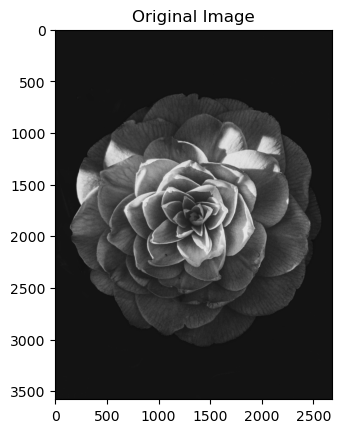

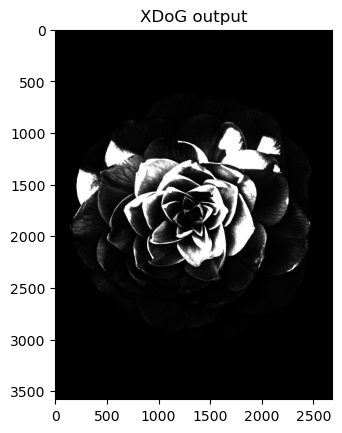

In [12]:
img = cv2.imread("../images/gray_rose.jpg")
plt.figure()
plt.imshow(img)
plt.title("Original Image")

img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
result = xdog(img,1.6,1.4,1,0.6,6)
plt.figure()
plt.imshow(result)
plt.title("XDoG output")